In [55]:
import numpy as np
from PIL import Image

In [57]:
img = np.random.random([321,321,3])

In [58]:
img = Image.fromarray((img * 255).astype(np.uint8))

In [60]:
channels = img.split()

In [63]:
channels[0].size

(321, 321)

In [64]:
img_s1 = Image.merge(channels)

TypeError: merge() missing 1 required positional argument: 'bands'

In [31]:
channels = []
for i in range(img.shape[2]):
        channels.append(img[:,:,i])  

In [33]:
channels[0].shape

(321, 321)

In [1]:
import torch
from torchvision import transforms


In [3]:
img = torch.randn(110,110,80)


80

In [53]:
img_s1 = transforms.ColorJitter(0.5, 0.5, 0.5, 0.25)(img)

TypeError: Input image tensor permitted channel values are [1, 3], but found 110

In [66]:
channels_3d = np.zeros(([112,112,80]), dtype=np.uint8)

In [67]:
channels_3d.shape

(112, 112, 80)

In [37]:
import random
import torch
import numpy as np
def obtain_cutmix_box(img_size, p=0.5, size_min=0.02, size_max=0.4, ratio_1=0.3, ratio_2=1/0.3):
    mask = torch.zeros(img_size, img_size)
    if random.random() > p:
        return mask

    size = np.random.uniform(size_min, size_max) * img_size * img_size
    while True:
        ratio = np.random.uniform(ratio_1, ratio_2)
        cutmix_w = int(np.sqrt(size / ratio))
        cutmix_h = int(np.sqrt(size * ratio))
        x = np.random.randint(0, img_size)
        y = np.random.randint(0, img_size)
        print('size=',size)
        print("x + cutmix_w=",x + cutmix_w)
        print("y + cutmix_h=",y + cutmix_h)
        if x + cutmix_w <= img_size and y + cutmix_h <= img_size:
            break

    mask[y:y + cutmix_h, x:x + cutmix_w] = 1

    return mask

In [48]:
mask = obtain_cutmix_box(112)


size= 4244.083112402483
x + cutmix_w= 149
y + cutmix_h= 176
size= 4244.083112402483
x + cutmix_w= 50
y + cutmix_h= 124
size= 4244.083112402483
x + cutmix_w= 81
y + cutmix_h= 137
size= 4244.083112402483
x + cutmix_w= 108
y + cutmix_h= 73


In [95]:
def obtain_cutmix_3Dbox(img_size, p=0.5, size_min=0.02, size_max=0.4, ratio_1=0.3, ratio_2=1/0.3):
    print(img_size)
    mask = torch.zeros(img_size[0], img_size[1], img_size[2])
    if random.random() > p:
        return mask

    size = np.random.uniform(size_min, size_max) * img_size[0] * img_size[1]
    size2 = np.random.uniform(size_min, size_max) * img_size[2] * img_size[2]
    while True:
        ratio = np.random.uniform(ratio_1, ratio_2)
        cutmix_w = int(np.sqrt(size / ratio))
        cutmix_h = int(np.sqrt(size * ratio))
        cutmix_d = int(np.cbrt(size2 / (ratio ** 2)))
        x = np.random.randint(0, img_size[0])
        y = np.random.randint(0, img_size[1])
        z = np.random.randint(0, img_size[2])
        print('size=',size)
        print('size2=',size)
        print("x + cutmix_w=",x + cutmix_w)
        print("y + cutmix_h=",y + cutmix_h)
        print("z + cutmix_d=",z + cutmix_d)
        if x + cutmix_w <= img_size[0] and y + cutmix_h <= img_size[1] and z + cutmix_d <= img_size[2]:
            break

    mask[y:y + cutmix_h, x:x + cutmix_w, z:z + cutmix_d] = 1

    return mask


In [116]:
mask = obtain_cutmix_3Dbox([112, 112, 80])

[112, 112, 80]
size= 1091.1408398482072
size2= 1091.1408398482072
x + cutmix_w= 54
y + cutmix_h= 153
z + cutmix_d= 7
size= 1091.1408398482072
size2= 1091.1408398482072
x + cutmix_w= 35
y + cutmix_h= 76
z + cutmix_d= 48


In [5]:
import numpy as np
import random
import torch

In [35]:
def obtain_cutmix_3Dbox(img_size, p=0.5, size_min=0.02, size_max=0.4, ratio_1=0.3, ratio_2=1/0.3):
    height, width, depth = img_size
    mask = torch.zeros(height, width, depth)
    if random.random() > p:
        return mask

    size = np.random.uniform(size_min, size_max) * height * width * depth
    while True:
        ratio = np.random.uniform(ratio_1, ratio_2)
        cutmix_w = int(np.sqrt(size / ratio / depth))
        cutmix_h = int(np.sqrt(size * ratio / depth))
        cutmix_d = np.random.randint(1, depth)
        x = np.random.randint(0, width)
        y = np.random.randint(0, height)
        z = np.random.randint(0, depth)
        print("x ",x )
        print("y ",y )
        print("z ",z )
        print("cutmix_w= ",cutmix_w)
        print("cutmix_h= ",cutmix_h)
        print("cutmix_d= ",cutmix_d)
        print("x + cutmix_w=",x + cutmix_w)
        print("y + cutmix_h=",y + cutmix_h)
        print("z + cutmix_d=",z + cutmix_d)
        if x + cutmix_w <= width and y + cutmix_h <= height and z + cutmix_d <= depth:
            break

    mask[y:y + cutmix_h, x:x + cutmix_w, z:z + cutmix_d] = 1

    return mask

In [113]:
mask = obtain_cutmix_3Dbox((112,112,80))
mask.shape

x  101
y  26
z  4
cutmix_w=  29
cutmix_h=  55
cutmix_d=  54
x + cutmix_w= 130
y + cutmix_h= 81
z + cutmix_d= 58
x  81
y  60
z  20
cutmix_w=  23
cutmix_h=  67
cutmix_d=  10
x + cutmix_w= 104
y + cutmix_h= 127
z + cutmix_d= 30
x  52
y  11
z  45
cutmix_w=  24
cutmix_h=  66
cutmix_d=  48
x + cutmix_w= 76
y + cutmix_h= 77
z + cutmix_d= 93
x  110
y  22
z  65
cutmix_w=  33
cutmix_h=  47
cutmix_d=  33
x + cutmix_w= 143
y + cutmix_h= 69
z + cutmix_d= 98
x  60
y  82
z  9
cutmix_w=  62
cutmix_h=  25
cutmix_d=  6
x + cutmix_w= 122
y + cutmix_h= 107
z + cutmix_d= 15
x  37
y  13
z  35
cutmix_w=  53
cutmix_h=  29
cutmix_d=  64
x + cutmix_w= 90
y + cutmix_h= 42
z + cutmix_d= 99
x  111
y  99
z  72
cutmix_w=  51
cutmix_h=  31
cutmix_d=  50
x + cutmix_w= 162
y + cutmix_h= 130
z + cutmix_d= 122
x  46
y  107
z  51
cutmix_w=  22
cutmix_h=  72
cutmix_d=  26
x + cutmix_w= 68
y + cutmix_h= 179
z + cutmix_d= 77
x  69
y  50
z  65
cutmix_w=  51
cutmix_h=  31
cutmix_d=  53
x + cutmix_w= 120
y + cutmix_h= 81
z + cu

torch.Size([112, 112, 80])

In [45]:
def obtain_cutmix_box(img_size, p=0.5, size_min=0.02, size_max=0.4, ratio_1=0.3, ratio_2=1/0.3):
    mask = torch.zeros(img_size, img_size)
    if random.random() > p:
        return mask

    size = np.random.uniform(size_min, size_max) * img_size * img_size
    while True:
        ratio = np.random.uniform(ratio_1, ratio_2)
        cutmix_w = int(np.sqrt(size / ratio))
        cutmix_h = int(np.sqrt(size * ratio))
        x = np.random.randint(0, img_size)
        y = np.random.randint(0, img_size)
        print("x ",x )
        print("y ",y )
        # print("z ",z )|
        print("cutmix_w= ",cutmix_w)
        print("cutmix_h= ",cutmix_h)
        # print("cutmix_d= ",cutmix_d)
        print("x + cutmix_w=",x + cutmix_w)
        print("y + cutmix_h=",y + cutmix_h)
        # print("z + cutmix_d=",z + cutmix_d)
        if x + cutmix_w <= img_size and y + cutmix_h <= img_size:
            break

    mask[y:y + cutmix_h, x:x + cutmix_w] = 1

    return mask

In [79]:
mask = obtain_cutmix_box(513)
mask.shape

x  409
y  45
cutmix_w=  151
cutmix_h=  416
x + cutmix_w= 560
y + cutmix_h= 461
x  267
y  171
cutmix_w=  190
cutmix_h=  330
x + cutmix_w= 457
y + cutmix_h= 501


torch.Size([513, 513])

In [2]:
import h5py
import numpy as np
from PIL import Image

In [33]:
# sample = h5py.File('/data/ACDC/data/slices/patient038_frame02_slice_3.h5', 'r')
sample = h5py.File('patient099_frame01_slice_11.h5', 'r')
# sample = h5py.File('/data/PROMISE12/data/slices/Case00_slice_0.h5', 'r')
img = sample['image'][:]
mask = sample['label'][:]
bi_mask = sample['bi_mask'][:]
np.max(mask)

3

In [76]:
print(img.shape)
bi_mask.shape

(224, 154)


(3, 154, 224)

In [3]:
label = Image.fromarray(mask * 255)
label = label.convert('L')

In [4]:
label.save('label.jpg')

In [37]:
np.max(mask)

0

In [100]:
img = Image.fromarray(np.array(img) * 255)
img = img.convert('L')
img.save('img.jpg')

In [109]:
img_pil = Image.fromarray(np.uint8(img)) 
mask_pil = Image.fromarray(np.uint8(mask * 255))

In [111]:
img_pil.save('img.jpg')
mask_pil.save('mask.jpg')

In [112]:
a = Image.open("output_image.jpg")

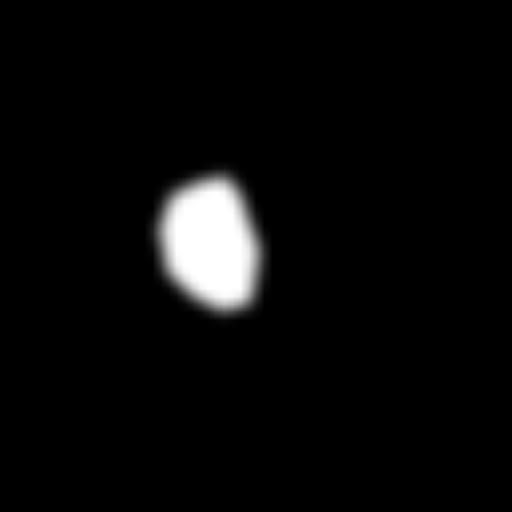

In [113]:
a

In [2]:
import torch
from torch import nn


In [13]:
loss = nn.CrossEntropyLoss()
input = torch.randn(12, 2, 224, 224, requires_grad=True)
input.shape

torch.Size([12, 2, 224, 224])

In [14]:
target = torch.randn(12, 224, 224).softmax(dim=1)
target.shape

torch.Size([12, 224, 224])

In [16]:
target

tensor([[[0.0008, 0.0009, 0.0042,  ..., 0.0043, 0.0009, 0.0069],
         [0.0007, 0.0006, 0.0080,  ..., 0.0019, 0.0031, 0.0012],
         [0.0020, 0.0032, 0.0014,  ..., 0.0002, 0.0160, 0.0036],
         ...,
         [0.0023, 0.0117, 0.0048,  ..., 0.0176, 0.0035, 0.0029],
         [0.0018, 0.0009, 0.0036,  ..., 0.0071, 0.0023, 0.0011],
         [0.0035, 0.0004, 0.0025,  ..., 0.0223, 0.0018, 0.0008]],

        [[0.0017, 0.0046, 0.0028,  ..., 0.0044, 0.0055, 0.0175],
         [0.0012, 0.0044, 0.0038,  ..., 0.0193, 0.0077, 0.0081],
         [0.0054, 0.0029, 0.0024,  ..., 0.0006, 0.0069, 0.0035],
         ...,
         [0.0039, 0.0077, 0.0393,  ..., 0.0036, 0.0013, 0.0012],
         [0.0006, 0.0037, 0.0016,  ..., 0.0039, 0.0011, 0.0101],
         [0.0140, 0.0018, 0.0136,  ..., 0.0011, 0.0025, 0.0103]],

        [[0.0099, 0.0081, 0.0020,  ..., 0.0314, 0.0015, 0.0055],
         [0.0027, 0.0018, 0.0013,  ..., 0.0047, 0.0153, 0.0026],
         [0.0035, 0.0025, 0.0021,  ..., 0.0007, 0.0026, 0.

In [17]:
target.long()

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [15]:
output = loss(input, target)
output

RuntimeError: expected scalar type Long but found Float

In [18]:
import numpy as np

# 定义softmax函数
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

# 定义softmax交叉熵损失函数
def softmax_cross_entropy_loss(y_true, y_pred):
    # y_true是真实标签，y_pred是预测值
    return -np.sum(y_true * np.log(y_pred), axis=1)


In [33]:
i = np.random.random((12, 2, 224, 224))

In [34]:
t = np.random.random((12, 1, 224, 224))

In [37]:
i_s = softmax(i)

In [38]:
loss = softmax_cross_entropy_loss(i_s, t)

In [39]:
loss = np.mean(loss)

In [40]:
loss

0.9994027287915122

In [ ]:
import torch
import torch.nn.functional as F

# 假设logit输出和mask已经存在
# logit: (12, 2, 256, 256)
# mask: (12, 256, 256)

# 将logit输出沿着第二个维度求softmax
logit = F.softmax(logit, dim=1) # (12, 2, 256, 256)

# 将mask值沿着第二个维度扩展
mask = mask.unsqueeze(1) # (12, 1, 256, 256)

# 将logit输出和mask值转换为二维张量
# 每一行表示一个样本的类别概率
logit = logit.view(-1, 2) # (12 * 256 * 256, 2)
mask = mask.view(-1, 2) # (12 * 256 * 256, 2)

# 计算多项式交叉熵
loss_ce = F.cross_entropy(logit, mask) # scalar

# 或者使用公式直接计算
loss_ce = -torch.sum(mask * torch.log(logit + 1e-6), dim=1).mean() # scalar

# 计算KL散度
loss_kl = F.kl_div(logit, mask) # scalar

# 或者使用公式直接计算
loss_kl = torch.sum(mask * torch.log((mask + 1e-6) / (logit + 1e-6)), dim=1).mean() # scalar


In [58]:
import torch
def norm(w):
    h = torch.sqrt(w.sum(-1)) 
    d_inv = 1.0 / torch.max(h, torch.ones_like(h) * 1e-20)
    d_inv = torch.unsqueeze(d_inv, dim=-1) * torch.unsqueeze(d_inv, dim=-2)
    w = w * d_inv
    return w

In [70]:
def norm2(w):
    h = torch.sqrt(w.sum(1))
    d_inv = 1.0 / (h)
    d_inv = torch.unsqueeze(d_inv, dim=-1) * d_inv
    w = w * d_inv
    return w

In [68]:
w = torch.randn(1,2,2)
w

tensor([[[ 0.4311, -2.5776],
         [ 1.5184,  1.3541]]])

In [69]:
norm(torch.abs(w))


tensor([[[0.1433, 0.8768],
         [0.5165, 0.4714]]])

In [71]:
norm2(torch.squeeze(torch.abs(w), dim=0))

tensor([[0.1433, 0.8768],
        [0.5165, 0.4714]])

In [52]:
torch.eps()

AttributeError: module 'torch' has no attribute 'eps'

In [27]:
b = torch.unsqueeze(a, dim=-1)
b.shape

torch.Size([256, 1])

In [29]:
c = (b * a)
c.shape

torch.Size([256, 256])

In [30]:
(w * c).shape

torch.Size([256, 256])

In [31]:
w.shape

torch.Size([256, 256])

In [37]:
def batch_norm(w):
    # Calculate the L2 norm along the last two dimensions (224x224) for each batch element
    h = torch.sqrt(torch.sum(w ** 2, dim=(-2, -1), keepdim=True))
    
    # Compute the diagonal matrix with the reciprocal of norms
    d_inv = 1.0 / h
    
    # Compute the normalization matrix for each batch element
    norm_matrix = d_inv * d_inv.permute(0, 2, 1)
    
    # Element-wise multiplication of the input with the normalization matrix
    w_normalized = w * norm_matrix
    
    return w_normalized

In [38]:
batch_norm(torch.randn(24,224,224)).shape

RuntimeError: permute(sparse_coo): number of dimensions in the tensor input does not match the length of the desired ordering of dimensions i.e. input.dim() = 2 is not equal to len(dims) = 3

In [36]:
torch.sum(w ** 2, dim=(-2, -1), keepdim=True).shape

torch.Size([24, 1, 1])

In [41]:
h = torch.sqrt(torch.sum(w, dim=-1))
h.shape

torch.Size([24, 256])

In [43]:
d_inv = 1.0 / h
d_inv.shape

torch.Size([24, 256])

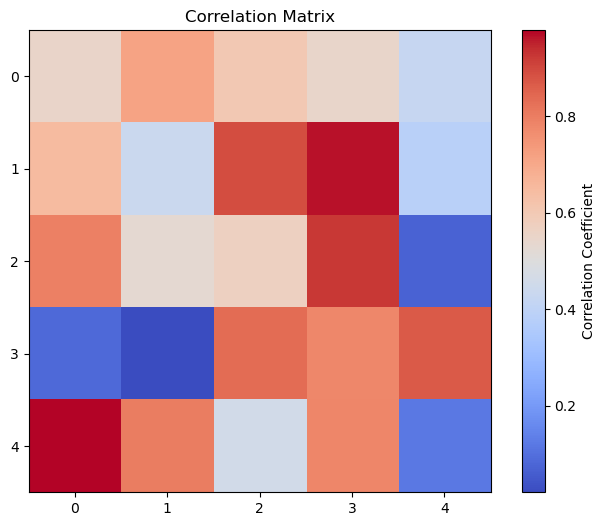

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# 创建一个随机的相关矩阵作为示例数据
np.random.seed(0)
corr_matrix = np.random.rand(5, 5)

# 绘制相关矩阵示意图
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.title('Correlation Matrix')
# plt.xticks(np.arange(5), ['A', 'B', 'C', 'D', 'E'])
# plt.yticks(np.arange(5), ['A', 'B', 'C', 'D', 'E'])
plt.show()


In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

# 读取图片并转换为灰度图像
image_path = '/home/tzb/code/semi/UniMatch_medical/more-scenarios/medical/label.jpg'
image = plt.imread(image_path)
gray_image = np.mean(image, axis=2)

# 计算相关矩阵
corr_matrix = np.corrcoef(gray_image.reshape(-1, gray_image.shape[2]), rowvar=False)

# 绘制相关矩阵示意图
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.title('Correlation Matrix of Image Pixels')
plt.show()


AxisError: axis 2 is out of bounds for array of dimension 2

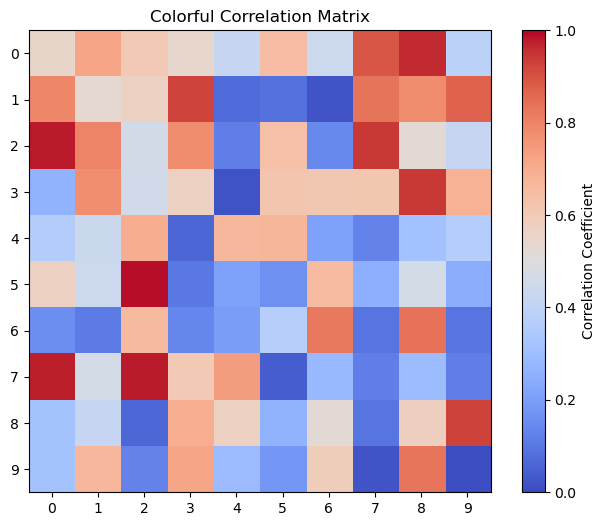

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# 生成随机颜色相关矩阵
np.random.seed(0)
size = 10
corr_matrix = np.random.rand(size, size)

# 绘制相关矩阵示意图
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', vmin=0, vmax=1)
plt.colorbar(label='Correlation Coefficient')
plt.title('Colorful Correlation Matrix')
plt.xticks(np.arange(size))
plt.yticks(np.arange(size))
plt.show()


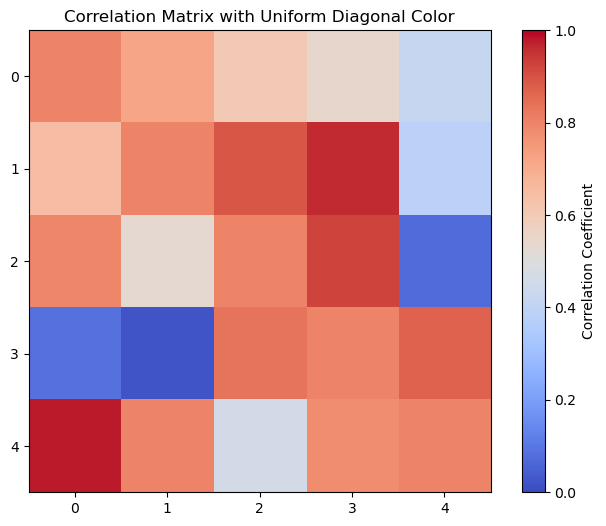

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# 生成随机颜色相关矩阵
np.random.seed(0)
size = 5
corr_matrix = np.random.rand(size, size)

# 将对角线上的值设置为常数
diagonal_value = 0.8
np.fill_diagonal(corr_matrix, diagonal_value)

# 绘制相关矩阵示意图
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', vmin=0, vmax=1)
plt.colorbar(label='Correlation Coefficient')
plt.title('Correlation Matrix with Uniform Diagonal Color')
plt.xticks(np.arange(size))
plt.yticks(np.arange(size))
plt.show()


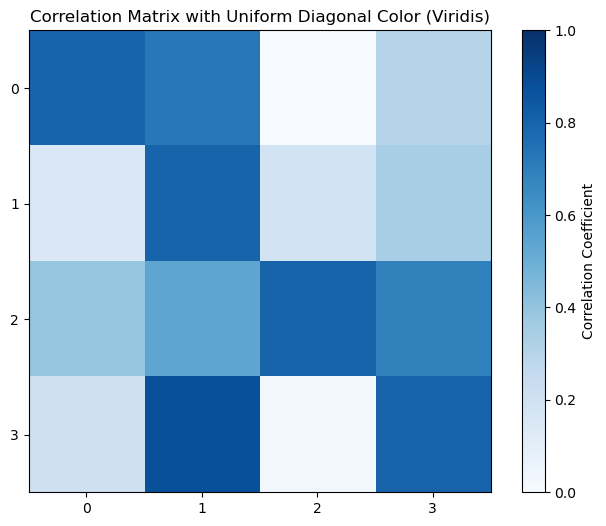

In [111]:
import numpy as np
import matplotlib.pyplot as plt

# 生成随机颜色相关矩阵
np.random.seed(1)
size = 4
corr_matrix = np.random.rand(size, size)

# 将对角线上的值设置为常数
diagonal_value = 0.8
np.fill_diagonal(corr_matrix, diagonal_value)

# 绘制相关矩阵示意图，使用 'viridis' 颜色映射
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='Blues', vmin=0, vmax=1)
plt.colorbar(label='Correlation Coefficient')
plt.title('Correlation Matrix with Uniform Diagonal Color (Viridis)')
plt.xticks(np.arange(size))
plt.yticks(np.arange(size))
plt.show()


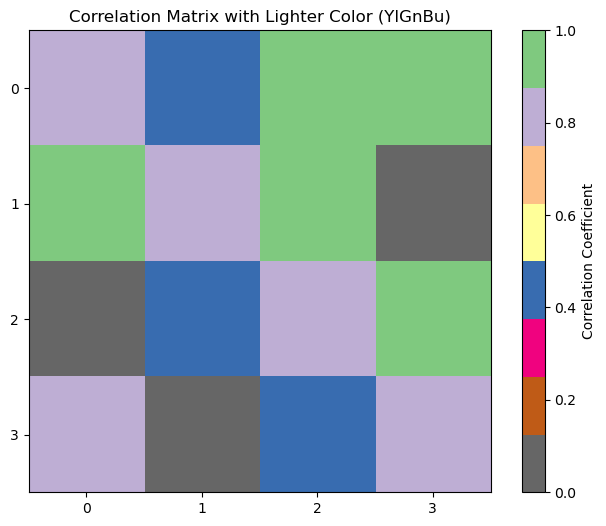

In [100]:
import numpy as np
import matplotlib.pyplot as plt

# 生成随机颜色相关矩阵
np.random.seed(0)
size = 4
corr_matrix = np.random.randn(size, size)

# 将对角线上的值设置为常数
diagonal_value = 0.8
np.fill_diagonal(corr_matrix, diagonal_value)

# 绘制相关矩阵示意图，使用 'YlGnBu' 颜色映射
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='Accent_r', vmin=0, vmax=1)
plt.colorbar(label='Correlation Coefficient')
plt.title('Correlation Matrix with Lighter Color (YlGnBu)')
plt.xticks(np.arange(size))
plt.yticks(np.arange(size))
plt.show()


'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'